In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
maindf=pd.read_csv('/content/BTC-USD.csv')

In [37]:
maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3347,2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366
3348,2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,36596.683594,22445028430
3349,2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125,36585.703125,11886022717
3350,2023-11-19,36585.765625,37509.355469,36414.597656,37386.546875,37386.546875,12915986553


In [38]:
maindf.describe().round()

,Open,High,Low,Close,Adj Close,Volume
count,3352.0,3352.0,3352.0,3352.0,3352.0,3.352000e+03
mean,14247.0,14583.0,13883.0,14256.0,14256.0,1.647821e+10
std,16012.0,16401.0,15572.0,16012.0,16012.0,1.917560e+10
min,177.0,212.0,172.0,178.0,178.0,5.914570e+06
25%,897.0,910.0,864.0,898.0,898.0,1.470975e+08
50%,8161.0,8288.0,7928.0,8164.0,8164.0,1.094857e+10
75%,23087.0,23468.0,22697.0,23123.0,23123.0,2.695812e+10
max,67550.0,68790.0,66382.0,67567.0,67567.0,3.509679e+11


In [39]:
maindf.shape

(3352, 7)

In [42]:
# Check for Null
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [41]:
# Dates
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2023-11-20


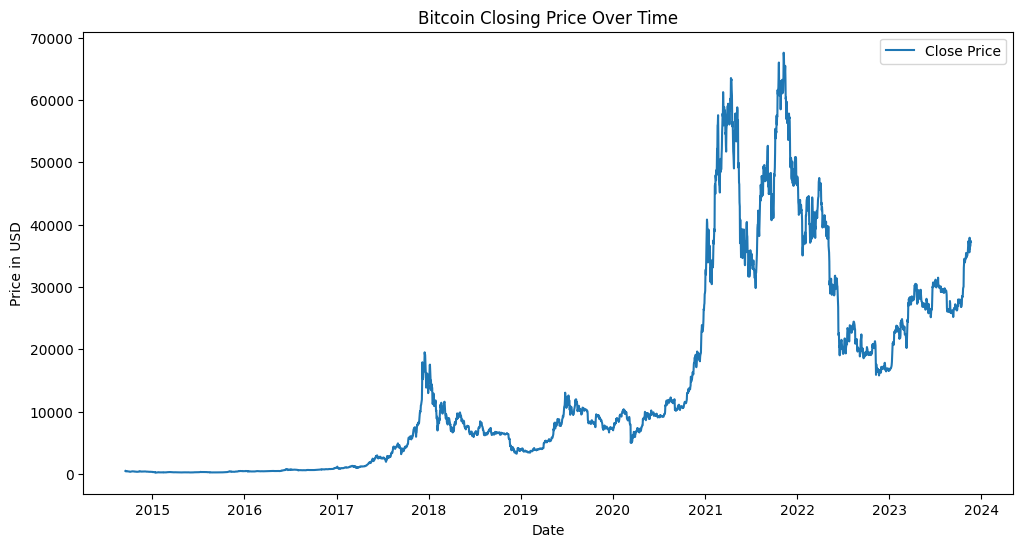

In [24]:

maindf['Date'] = pd.to_datetime(maindf['Date'])
maindf.set_index('Date', inplace=True)

# Plotting Closing Price over Time
plt.figure(figsize=(12, 6))
plt.plot(maindf['Close'], label='Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

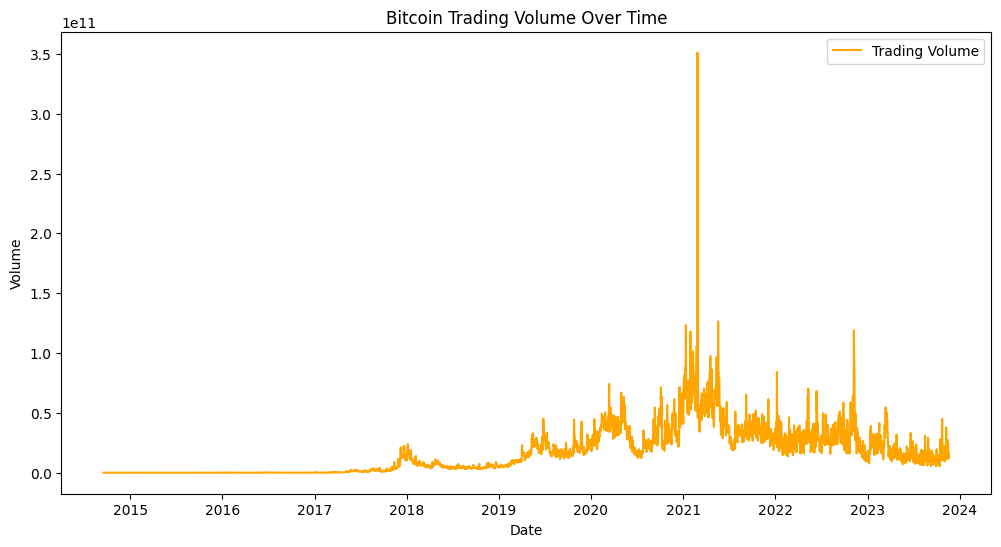

In [25]:
# Plotting Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(maindf['Volume'], label='Trading Volume', color='orange')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

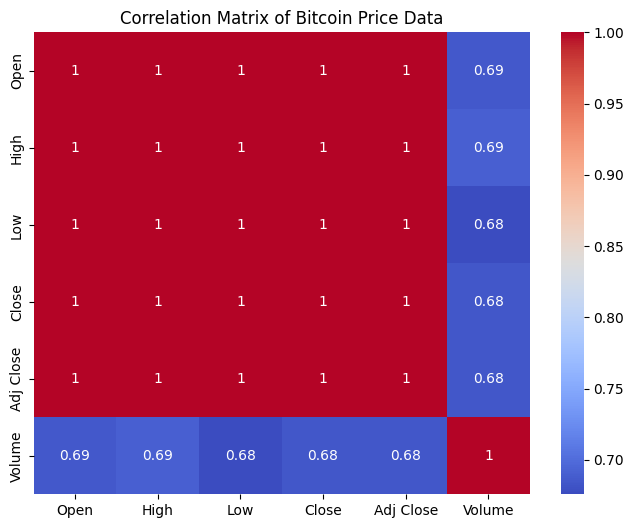

In [26]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(maindf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Price Data')
plt.show()

<Figure size 1200x600 with 0 Axes>

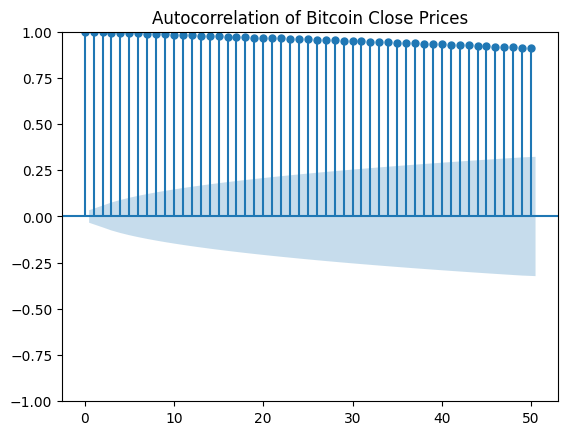

In [28]:
# Autocorrelation plot for Close Price
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(maindf['Close'], lags=50)
plt.title('Autocorrelation of Bitcoin Close Prices')
plt.show()